> PROBLEMA DE NEGÓCIO:
- Aqui o objetivo é realizar um estudo da evolução das ações da Tesla (TSLA)
- **Dataset**: dataset3

## Instalando e Carregando os Pacotes

In [1]:
!pip install yfinance

In [2]:
!pip install -q pandas_datareader

In [3]:
# Imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import pandas_datareader
import sqlite3
import yfinance
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Criando variável com o código da ação da Tesla (TSLA)
tesla = "TSLA" 

In [5]:
# Baixando as informações
tesla = yfinance.download(tesla)

[*********************100%***********************]  1 of 1 completed


In [6]:
# Dimensões do dataset
tesla.shape

(3239, 6)

In [7]:
tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


Caso você não saiba o que significam as colunas:
- Open: preço de abertura
- High: valor máximo
- Low: valor mínimo
- Close: preço de fechamento
- AdjClose: preço ajustado
- Volume: volume negociado

In [8]:
# Estatísticas do dataset
tesla.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3239.000000,3239.000000,3239.000000,3239.000000,3239.000000,3.239000e+03
mean,62.013034,63.409428,60.481358,61.977438,61.977438,9.541476e+07
std,96.288674,98.504081,93.799626,96.177731,96.177731,8.157361e+07
min,1.076000,1.108667,0.998667,1.053333,1.053333,1.777500e+06
25%,9.538333,9.720000,9.305000,9.559666,9.559666,4.368075e+07
50%,16.507334,16.733334,16.306000,16.514000,16.514000,7.757250e+07
75%,37.970667,38.626999,36.995335,37.723999,37.723999,1.212009e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [9]:
# Informações das variáveis
tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3239 entries, 2010-06-29 to 2023-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3239 non-null   float64
 1   High       3239 non-null   float64
 2   Low        3239 non-null   float64
 3   Close      3239 non-null   float64
 4   Adj Close  3239 non-null   float64
 5   Volume     3239 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 177.1 KB


In [10]:
# Criando um banco de dados dos dados da Tesla em SQLite
conn = sqlite3.connect("dados/TSLA.db") # criando conexão
c = conn.cursor() 

In [11]:
# Aqui convertermos o dataset para SQL e gravmos em nossa conexão
tesla.to_sql("TSLA", conn, if_exists = 'replace')

3239

In [12]:
# Visualiza os dados
c.execute("""SELECT * FROM TSLA""")
rows = c.fetchall()
rows

[('2010-06-29 00:00:00',
  1.2666670083999634,
  1.6666669845581055,
  1.1693329811096191,
  1.5926669836044312,
  1.5926669836044312,
  281494500),
 ('2010-06-30 00:00:00',
  1.7193330526351929,
  2.0280001163482666,
  1.553333044052124,
  1.5886670351028442,
  1.5886670351028442,
  257806500),
 ('2010-07-01 00:00:00',
  1.6666669845581055,
  1.7280000448226929,
  1.3513330221176147,
  1.4639999866485596,
  1.4639999866485596,
  123282000),
 ('2010-07-02 00:00:00',
  1.5333329439163208,
  1.5399999618530273,
  1.24733304977417,
  1.2799999713897705,
  1.2799999713897705,
  77097000),
 ('2010-07-06 00:00:00',
  1.3333330154418945,
  1.3333330154418945,
  1.0553330183029175,
  1.0740000009536743,
  1.0740000009536743,
  103003500),
 ('2010-07-07 00:00:00',
  1.0933330059051514,
  1.108667016029358,
  0.9986670017242432,
  1.053333044052124,
  1.053333044052124,
  103825500),
 ('2010-07-08 00:00:00',
  1.0759999752044678,
  1.1679999828338623,
  1.0379999876022339,
  1.1640000343322754,


In [14]:
# Gerando um arquivo excel com as informações
tesla.to_excel("dados/TSLA.xlsx")

In [16]:
# Esse comando carrega o arquivo excel
df = pd.read_excel("dados/TSLA.xlsx")

In [17]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


In [18]:
df['Date']

0      2010-06-29
1      2010-06-30
2      2010-07-01
3      2010-07-02
4      2010-07-06
          ...    
3234   2023-05-04
3235   2023-05-05
3236   2023-05-08
3237   2023-05-09
3238   2023-05-10
Name: Date, Length: 3239, dtype: datetime64[ns]

In [19]:
df['Close']

0         1.592667
1         1.588667
2         1.464000
3         1.280000
4         1.074000
           ...    
3234    161.199997
3235    170.059998
3236    171.789993
3237    169.149994
3238    168.539993
Name: Close, Length: 3239, dtype: float64

#### 01- Gráfico de Linha com a evolução da variável preço ao longo do tempo

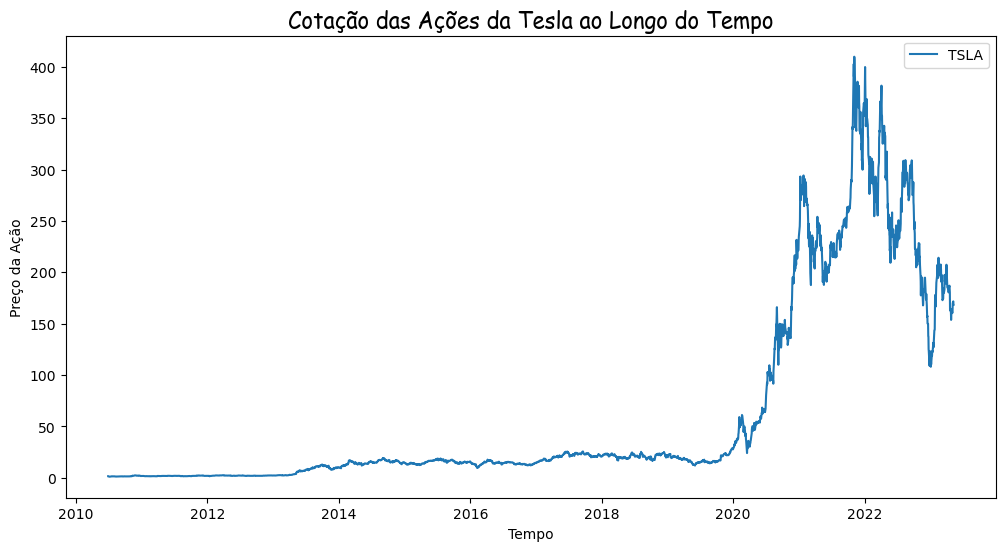

In [20]:
# Definindo X e Y
x = df['Date']
y = df['Close']

# Tamanho da figura (dpi especifica pixels por polegada)
plt.figure(figsize = (12,6), dpi = 100)

# Plotando
plt.plot(x, y, label = 'TSLA')

# Title e formatação
plt.title('Cotação das Ações da Tesla ao Longo do Tempo', 
          fontdict = {'fontname': 'Comic Sans MS', 'fontsize': 16})

# Labels
plt.xlabel('Tempo')
plt.ylabel('Preço da Ação')

# Legenda
plt.legend()

# Salva a figura com alta resolução
# plt.savefig('imagens/acoes_tesla.png', dpi = 300)

plt.show()

# Fim